In [44]:
# get recall and precision for dictionary
import embeddingvectorizer
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

import gensim
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from nltk.corpus import stopwords

from string import punctuation
import nltk

In [254]:
PATH = '/Users/anne/surfdrive/uva/projects/RPA_KeepingScore/data/RPA_data_with_dictionaryscores.pkl'

In [53]:
pipe_aem_300d = Pipeline([
    ("word2vec vectorizer", TfidfVectorizer()),
    ("svm", SGDClassifier(loss='hinge', penalty='l2', tol=1e-4, alpha=1e-6, max_iter=1000, random_state=42))
    ])

pipe_aem_300d.fit(X_train, y_train)
preds = pipe_aem_300d.predict(X_test)

print('Test accuracy is {}'.format(accuracy_score(y_test, preds)))

NameError: name 'X_train' is not defined

In [255]:
df = pd.read_pickle(PATH)
df['main_topic_id'] = df['main_topic_label'].factorize()[0]
d = df.groupby('main_topic_id')['main_topic_label'].max().to_dict()

In [159]:
ET_embedding = Pipeline([
    ("word2vec vectorizer", embeddingvectorizer.EmbeddingCountVectorizer(MDL, 'mean')),
    ("classifier", ExtraTreesClassifier(n_estimators=200))
    ])

ET_embedding.fit(X_train, y_train)
preds = ET_embedding.predict(X_test)

print('Test accuracy is {}'.format(accuracy_score(y_test, preds)))

Test accuracy is 0.5124555160142349


In [160]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.72      0.57      0.63       122
           1       0.40      0.91      0.56        11
           2       0.22      0.86      0.35         7
           3       0.68      0.51      0.59        70
           4       0.25      0.83      0.38         6
           5       0.25      0.88      0.39         8
           6       0.62      0.67      0.64        57
           7       0.84      0.35      0.49       217
           8       0.37      0.79      0.50        14
           9       0.35      0.58      0.44        24
          10       0.06      0.33      0.10         3
          11       0.21      0.78      0.33         9
          12       0.21      0.67      0.32         6
          13       0.00      0.00      0.00         0
          14       0.23      0.62      0.33         8

   micro avg       0.51      0.51      0.51       562
   macro avg       0.36      0.62      0.40       562
weighted avg       0.68   

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [901]:
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train.text)
vectorizer.fit(test.text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

KeyError: "None of [Index(['attrresp', 'cnflct', 'ecnmc', 'hmnintrst'], dtype='object')] are in the [columns]"

Text(0.5, 0, '# of categories')

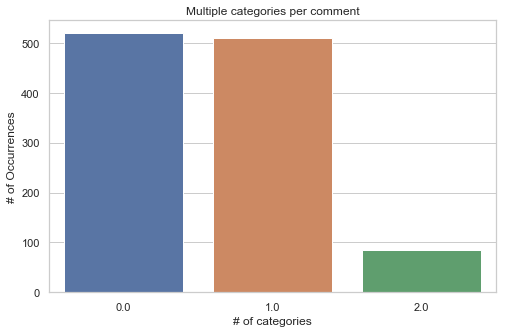

In [55]:
rowsums = df_.iloc[:,3:].sum(axis=1)
x=rowsums.value_counts()
#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple categories per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of categories', fontsize=12)

In [209]:
df['attrresp'].value_counts()

2.0    928
1.0    492
Name: attrresp, dtype: int64

In [200]:
# Using pipeline for applying logistic regression and one vs rest classifier

LogReg_pipeline = Pipeline([
                 ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(PassiveAggressiveClassifier())),
            ])

for category in frames:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print(classification_report(test[category], prediction))
    print("\n")

**Processing attrresp comments...**


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Test accuracy is 0.6278026905829597
              precision    recall  f1-score   support

         0.0       0.64      0.73      0.68       123
         1.0       0.60      0.50      0.55       100

   micro avg       0.63      0.63      0.63       223
   macro avg       0.62      0.62      0.62       223
weighted avg       0.62      0.63      0.62       223



**Processing cnflct comments...**


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Test accuracy is 0.5829596412556054
              precision    recall  f1-score   support

         0.0       0.58      0.53      0.56       109
         1.0       0.59      0.63      0.61       114

   micro avg       0.58      0.58      0.58       223
   macro avg       0.58      0.58      0.58       223
weighted avg       0.58      0.58      0.58       223



**Processing ecnmc comments...**


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Test accuracy is 0.7713004484304933
              precision    recall  f1-score   support

         0.0       0.77      0.91      0.83       140
         1.0       0.78      0.54      0.64        83

   micro avg       0.77      0.77      0.77       223
   macro avg       0.77      0.72      0.74       223
weighted avg       0.77      0.77      0.76       223



**Processing hmnintrst comments...**
Test accuracy is 0.7713004484304933
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85       173
         1.0       0.49      0.46      0.47        50

   micro avg       0.77      0.77      0.77       223
   macro avg       0.67      0.66      0.66       223
weighted avg       0.77      0.77      0.77       223





/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [171]:
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                 ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])
for category in frames:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing attrresp comments...**
Test accuracy is 0.6053811659192825


**Processing cnflct comments...**
Test accuracy is 0.5829596412556054


**Processing ecnmc comments...**
Test accuracy is 0.7309417040358744


**Processing hmnintrst comments...**
Test accuracy is 0.7937219730941704




In [178]:
SVC_pipeline = Pipeline([
                ('tfidf', embeddingvectorizer.EmbeddingTfidfVectorizer(MDL, 'mean')),
                ('clf', OneVsRestClassifier(ExtraTreesClassifier())),
            ])

for category in frames:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    SVC_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = SVC_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")


**Processing attrresp comments...**


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Test accuracy is 0.6143497757847534


**Processing cnflct comments...**


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Test accuracy is 0.5650224215246636


**Processing ecnmc comments...**


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Test accuracy is 0.7399103139013453


**Processing hmnintrst comments...**


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Test accuracy is 0.7713004484304933




In [176]:
SVC_pipeline = Pipeline([
                ('tfidf',  TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])

for category in frames:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    SVC_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = SVC_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")


**Processing attrresp comments...**
Test accuracy is 0.6233183856502242


**Processing cnflct comments...**
Test accuracy is 0.5739910313901345


**Processing ecnmc comments...**
Test accuracy is 0.7802690582959642


**Processing hmnintrst comments...**
Test accuracy is 0.7713004484304933




In [28]:
SVC_pipeline = Pipeline([
                ('tfidf',  TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])

NameError: name 'LinearSVC' is not defined

In [1023]:
df = df[['text','cnflct','ecnmc','hmnintrst']]

143

In [1057]:
from sklearn.pipeline import Pipeline
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.ensemble import RandomForestClassifier

binary_rel_model = BinaryRelevance(RandomForestClassifier(n_jobs=-1))
multi_label_rf_br_model = Pipeline(steps=[
                           ('feature_union', fu),
                           ('binary_relevance', binary_rel_model)
                        ])

ModuleNotFoundError: No module named 'skmultilearn'

In [29]:
SVC_pipeline = Pipeline([
                ('tfidf',  embeddingvectorizer.EmbeddingTfidfVectorizer(MDL, 'mean')),
                ('clf', OneVsRestClassifier(ExtraTreesClassifier(n_estimators=200))),
            ])

for category in frames:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(x_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing attrresp
Test accuracy is 0.8414634146341463
... Processing cnflct
Test accuracy is 0.6515679442508711
... Processing ecnmc
Test accuracy is 0.7979094076655052
... Processing hmnintrst
Test accuracy is 0.7439024390243902


In [51]:
#len(df[df['type'] == 'parlementary question'])

2866

In [1056]:
SVC_pipeline = Pipeline([
                ('tfidf',  TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])

for category in frames:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(x_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing attrresp
Test accuracy is 0.8237238340066103
... Processing cnflct
Test accuracy is 0.6793977230995226
... Processing ecnmc
Test accuracy is 0.7440323172970987
... Processing hmnintrst
Test accuracy is 0.7767168564083731


In [966]:
for category in frames:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(x_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing attrresp


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Test accuracy is 0.9200164068908941
... Processing cnflct


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Test accuracy is 0.7415914684167351
... Processing ecnmc


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Test accuracy is 0.8219852337981952
... Processing hmnintrst


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Test accuracy is 0.8035274815422477


In [949]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])

In [952]:
for category in frames:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(x_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing attrresp
Test accuracy is 0.9212469237079574
... Processing cnflct
Test accuracy is 0.7858900738310091
... Processing ecnmc
Test accuracy is 0.8519278096800657
... Processing hmnintrst
Test accuracy is 0.8359310910582445


In [799]:
import os, re, logging
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import defaultdict
from nltk.stem.snowball import SnowballStemmer
import seaborn as sns
import logging

BASE_DICT = '/Users/anne/repos/RPA/resources/'
FILENAME_DICT = '20140718_dutchdictionary.txt'
PATH_TO_DATA = '~/surfdrive/uva/projects/RPA_KeepingScore/data/'

MINNUMBERMATCHES = 2 # min number of times a keyword should occur for a topic to be present

stemmer = SnowballStemmer("dutch")

def label_topic(x):
    if x == '1':
        return 'Macro-economie en belastingen'
    if x == '2':
        return 'Burgerrechten en vrijheden'
    if x == '3':
        return 'Gezondheid'
    if x == '4':
        return 'Landbouw en Visserij'
    if x == '5':
        return 'Arbeid'
    if x == '6':
        return 'Onderwijs'
    if x == '7':
        return 'Milieu'
    if x == '8':
        return 'Energiebeleid'
    if x == '9':
        return 'Immigratie en integratie'
    if x == '10':
        return 'Verkeer en vervoer'
    if x == '11':
        return 'Unkown'
    if x == '12':
        return 'Justitie, Rechtspraak, Criminaliteit'
    if x == '13':
        return 'sociale Zaken'
    if x == '14':
        return 'Gemeenschapsontwikkeling, huisvestingsbeleid en stedelijke planning'
    if x == '15':
        return 'Ondernemingen, Bankwezen en binnenlandse handel '
    if x == '16':
        return 'Defensie'
    if x == '17':
        return 'Wetenschappelijk onderzoek, technologie en communicatie'
    if x == '18':
        return 'Buitenlandse handel'
    if x == '19':
        return 'Buitenlandse zaken en ontwikkelingssamenwerking'
    if x == '20':
        return 'Functioneren democratie en openbaar bestuur'
    if x == '21':
        return 'Ruimtelijke ordening, publiek natuur- en waterbeheer'
    if x == '22':
        return 'Unkown 2'
    if x == '23':
        return 'Kunst, cultuur en entertainment'
    if x == '24':
        return '*** Gemeentelijk en provinciaal bestuur'
    if x == '29':
        return '*** Sport'
    if x == '00':
        return 'Toegevoegde codes voor media'

def parse_xml():
    '''reads file with topic numbers + words and parses the title'''

    words = []
    topics = []
    for l in [line.strip() for line in open(os.path.join(BASE_DICT , FILENAME_DICT)).readlines() if len(line)>1] :
        topics_words = defaultdict(list)
        if l.startswith('<cnode'):
            wordlist = []
            topics_l = list(re.sub('">|"|t', '', l.split('=')[1]) )
            if len(topics_l) == 2 :
                final_topic = "".join(topics_l)
            elif len(topics_l) == 3 :
                final_topic = topics_l[0]
            elif len(topics_l) == 4 :
                final_topic = "".join( topics_l[:2] )
        elif l.startswith('<pnode'):
            word = re.sub('">|</pnode>|"', '', l.split('=')[1])
            words.append(word)
            topics.append(final_topic)
    return words, topics

def get_dict():
    'returns a dict with keys = topic, values = words '

    words, topics = parse_xml()
    d = defaultdict(list)
    for topic, word in zip(topics, words):
        topic_name = label_topic(topic)
        d[topic_name].append(word)
    return d

def get_stemmed_dict():
    stemmer = SnowballStemmer("dutch")
    d = get_dict()
    stemmed_dictionary = {}
    for topic, words in d.items():
        stemmed_dictionary[topic] = [ stemmer.stem(w) for w in words ]
    return stemmed_dictionary

def get_raw_data():
    df = pd.read_pickle(PATH_TO_DATA + 'VK_TEL_merged_with_annotated.pkl')
    df['text_title'] = df['text'].astype(str) + ' ' + df['title'].astype(str)
 #   df = df[['text_title', 'main_topic', 'main_topic_label']]
    df.rename(columns={'text_title' : 'text', 'main_topic' : 'topic'}, inplace = True)
    df['type'] = 'newspaper'

    df2 = pd.read_pickle(PATH_TO_DATA + 'kamervragen_merged_with_annotated')
  #  df2 = df2[['questions', 'main_topic', 'main_topic_label']]
    df2.rename(columns={'questions' : 'text', 'main_topic' : 'topic'}, inplace = True)
    df2['type'] = 'parlementary question'

    df = df.append(df2)

    df['origin'] = 'RPA'
    df.reset_index(drop=True, inplace=True)
    df['documentnr'] = df.index
    logger.info("Appended the kamervragen dataset to the newspaper dataset, resulting in a df with a len of {}".format(len(df)))
    return df

#def get_bjorn_data():
#    df = pd.read_pickle(PATH_TO_DATA + 'dataset_burscher.pkl')
#    df['origin'] = 'Bjorn'
#    df['type'] = 'newspaper'
#    return df

#def get_recode_data():
#    '''match data according to coding of Bjorn '''

#    df = get_raw_data()

#    logger.info("Recoded data according to Bjorn's dataset. New topic categories are: {}".format(df['main_topic_label'].unique()))
#    return df

def get_data():
    df = get_raw_data()
    a = ['Macro-economie en belastingen', 'Wetenschappelijk onderzoek, technologie en communicatie',  'Toegevoegde codes voor media',  'Buitenlandse handel',  'Kunst, cultuur en entertainment', 'Energiebeleid', 'Ruimtelijke ordening, publiek natuur- en waterbeheer']
    b = ['Overige' ] * len(a)
    overige_cat = dict(zip(a,b))
    df['main_topic_label'].replace(overige_cat, inplace = True)
    df.reset_index(drop=True, inplace=True)
    df['documentnr'] = df.index
    logger.info("Retrieved the recoded dataset containing {} cases".format(len(df)))
    return df

In [800]:
df = get_data()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:7116: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


ValueError: Plan shapes are not aligned

In [766]:
import sklearn.metrics
import gensim

MODEL = '/Users/anne/repos/embedding_models/AEM_corpus/w2v_320d_AEM_corpus_2000-01-01_2017-12-31'
#PATH_TO_DATA = "../../tmpanne/RPA/"
#DATA = "RPA_and_Buschers_data_with_dictionaryscores.pkl"
#EPOCHS = 20

print("\nLoading model")

mod = gensim.models.Word2Vec.load(MODEL)
aem_320d = dict(zip(mod.wv.index2word, mod.wv.syn0))

2019-10-02 18:04:17,295 : INFO : 'pattern' package found; tag filters are available for English
2019-10-02 18:04:17,310 : INFO : loading Word2Vec object from /Users/anne/repos/embedding_models/AEM_corpus/w2v_320d_AEM_corpus_2000-01-01_2017-12-31



Loading model


2019-10-02 18:06:08,142 : INFO : loaded /Users/anne/repos/embedding_models/AEM_corpus/w2v_320d_AEM_corpus_2000-01-01_2017-12-31
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  if sys.path[0] == '':


In [ ]:
import embeddingvectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

pipe_aem_300d = Pipeline([
    ("word2vec vectorizer", embeddingvectorizer.EmbeddingTfidfVectorizer(aem_320d, 'mean')),
    ("svm", SGDClassifier(loss='hinge', penalty='l2', tol=1e-4, alpha=1e-6, max_iter=1000, random_state=42))
    ])

ET = Pipeline([
    ("word2vec vectorizer", embeddingvectorizer.EmbeddingTfidfVectorizer(aem_320d, 'mean')),
    ("ExtraTrees", RandomForestClassifier(n_estimators=20))
    ])

#pipe_aem_300d.fit(X_train, y_train)
#preds = pipe_aem_300d.predict(X_test)

ET.fit(X_train, y_train)
preds = ET.predict(X_test)

In [748]:
import sklearn.metrics
import gensim

MODEL = '../../tmpanne/fullsample/w2v_model_nr_7_window_10_size_300_negsample_15'
#PATH_TO_DATA = "../../tmpanne/RPA/"
#DATA = "RPA_and_Buschers_data_with_dictionaryscores.pkl"
#EPOCHS = 20

print("\nLoading model")

mod = gensim.models.Word2Vec.load(MODEL)
aem_320d = dict(zip(mod.wv.index2word, mod.wv.syn0))

574

In [754]:
df = get_data()

#df['main_topic_label'].value_counts()
df.main_topic_label.fillna(value='Overige', inplace=True)
len(df['main_topic_label'].unique())

16

In [736]:
PATH_TO_DATA = '~/surfdrive/uva/projects/RPA_KeepingScore/data/'
FILENAME = 'RPA_data_with_dictionaryscores.pkl'

OUTPUT_PATH ='../output/'

def get_data():
    df = pd.read_pickle(PATH_TO_DATA + FILENAME)
    return df

df = get_data()
df['n'] = 1
df.groupby('main_topic_label')['n'].sum()

remove = list(df.groupby('main_topic_label').filter(lambda x: len(x) < 80)['main_topic_label'].unique())
remove

['Macro-economie en belastingen',
 'Wetenschappelijk onderzoek, technologie en communicatie',
 'Toegevoegde codes voor media',
 'Buitenlandse handel',
 'Kunst, cultuur en entertainment',
 'Energiebeleid',
 'Ruimtelijke ordening, publiek natuur- en waterbeheer']

In [742]:
PATH_TO_DATA = '~/surfdrive/uva/projects/RPA_KeepingScore/data/'
FILENAME = 'RPA_data_with_dictionaryscores.pkl'

OUTPUT_PATH ='../output/'

def get_data():
    df = pd.read_pickle(PATH_TO_DATA + FILENAME)
    return df

df = get_data()
df

,text_x,topic,main_topic_label,type,origin,documentnr,topic_label_dictionary,index_words,smallest_index,len matches,...,_fn Landbouw en Visserij,st_tp Landbouw en Visserij,st_fp Landbouw en Visserij,st_fn Landbouw en Visserij,_tp Milieu,_fp Milieu,_fn Milieu,st_tp Milieu,st_fp Milieu,st_fn Milieu
0,"Van onze parlementaire redactie DEN HAAG, zon...",20,Functioneren democratie en openbaar bestuur,newspaper,RPA,0,Overige,NaN,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
1,HIGHLIGHT: Rotterdam houdt strenge selectie a...,6,Onderwijs,newspaper,RPA,1,Onderwijs,"[250, 176]",176.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,"Van onze parlementaire redactie DEN HAAG, don...",2,Burgerrechten en vrijheden,newspaper,RPA,2,Overige,NaN,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
3,"Van onze verslaggevers AMSTERDAM, woensdag Tb...",12,"Justitie, Rechtspraak, Criminaliteit",newspaper,RPA,3,Overige,NaN,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Van onze parlementaire redactie DEN HAAG - De...,15,"Ondernemingen, Bankwezen en binnenlandse handel",newspaper,RPA,4,Overige,[59],59.0,1.0,...,0,0,0,0,0,0,0,0,0,0
5,HIGHLIGHT: Kamer dringt aan op herstel contac...,16,Defensie,newspaper,RPA,5,Defensie,"[358, 9]",9.0,2.0,...,0,0,0,0,0,0,0,0,0,0
6,"Van onze parlementaire redactie DEN HAAG, zat...",2,Burgerrechten en vrijheden,newspaper,RPA,6,Overige,NaN,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
7,"door Roelien Wierstra UTRECHT, zondag Tweeder...",3,Gezondheid,newspaper,RPA,7,Overige,[153],153.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8,HIGHLIGHT: OUDERS OVERLEDEN MILITAIR DOEN DRA...,16,Defensie,newspaper,RPA,8,Defensie,"[453, 4, 471, 9, 476]",4.0,5.0,...,0,0,0,0,0,0,0,0,0,0
9,"Van onze parlementaire redactie DEN HAAG, vri...",12,"Justitie, Rechtspraak, Criminaliteit",newspaper,RPA,9,"Ondernemingen, Bankwezen en binnenlandse handel",[108],108.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [584]:
p = '/Users/anne/repos/RPA/output/output/f1_scores.json'

with open(p) as handle:
            dictdump = json.loads(handle.read()) 
            
df = pd.DataFrame.from_dict(dictdump).transpose()

In [2]:
import json
import logging
import pandas as pd

logger = logging.getLogger()
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level=logging.INFO)

class plot_accuracy_precision_recall():
    '''This prepares a CNN model and runs it'''

    def __init__(self, path_to_data, path_to_output, sample):
        self.path_to_data = path_to_data
        self.path_to_output = path_to_output
        self.sample = sample
        with open('../resources/topic_translation') as handle:
               self.translator = json.loads(handle.read()) 
  #      with open('../resources/numbers_to_topic.json') as handle:
   #            self.translator_numeric = json.loads(handle.read()) 
        
    def get_data_dictionary(self):
         # getting Dictionary Approach Data
        fname = '{}precision_recall_f1score_dictionary_stemmed{}.json'.format(self.path_to_data, self.sample)
        logger.info(fname)
        
        with open(fname) as handle:
            dictdump =  json.loads(handle.read()) 
            
        df = pd.DataFrame.from_dict(dictdump).transpose()
        df['classifier'] = 'Albaugh et al. (Dictionary) - stemmed'

        fname_notstemmed = '{}precision_recall_f1score_dictionary_not_stemmed{}.json'.format(self.path_to_data, self.sample)
        logger.info(fname_notstemmed)

        with open(fname_notstemmed) as handle:
            dictdump =  json.loads(handle.read()) 
            
        df2 = pd.DataFrame.from_dict(dictdump).transpose()
        df2['classifier'] = 'Albaugh et al. (Dictionary) - not stemmed'
        
        df = pd.concat([df, df2])
        df.rename(columns={0 :'precision',  1 :'recall', 2 :'f1-score'}, inplace=True)
        df.rename(index=self.translator, inplace=True)
        df['approach'] = 'Dictionary Approach'
        return df
    
    
    def get_data_cnn(self):
        
        '''create if/else for different samples'''
        
        fname_cnn = '{}precision_recall_f1score_embedding_vectorizer_text_clean{}.json'.format(self.path_to_data, self.sample)
        with open(fname_cnn) as handle:
            data =  json.loads(handle.read()) 
        
        df = pd.DataFrame.from_dict(data).transpose()
        df['approach'] = 'Embedding Vectorizer'
 #       df.rename(index=self.translator, inplace=True)
        df['classifier'] = 'Random Forest + Embedding Vectorizer'
    #    df.drop(['micro avg', 'macro avg'], inplace = True)
       # df.index = df.index.map(int)
        df.rename(index=d, inplace=True)
        df.rename(index=self.translator, inplace=True)
#        df = df[['f1-score', 'approach', 'classifier']]
        return df

    
    def get_data_sml(self):
    
        fname_sml = '{}SML_precision_recall_f1score_text_cleaned_{}.json'.format(self.path_to_data, self.sample)
        with open(fname_sml) as handle:
            class_report =  json.loads(handle.read()) 
            
        print(len(class_report))
        one, two, three, four = class_report
        one = pd.DataFrame(one).transpose()
        one['classifier'] = "Naive Bayes"
        logging.info("Results Gridsearch Naive Bayes: \n\nAlpha: {} \nNgram_range: {} \n\n."
              .format(one['clf__alpha'][one.index=='best estimators:'] [0] , 
                      one['vect__ngram_range'][one.index=='best estimators:'][0]) ) 

        two = pd.DataFrame(two).transpose()
        two['classifier'] = "Passive Agressive"

        logging.info("Results Gridsearch Passive Agressive: \n\nC: {} \nfit intercept: {} \nmax_iter: {} \nmax_loss: {} \nuse idf: {} \nvec ngram range: {}"
              .format(two['clf__C'][two.index=='best estimators:'] [0] , 
                      two['clf__fit_intercept'][two.index=='best estimators:'][0] , 
                      two['clf__max_iter'][two.index=='best estimators:'] [0] , 
                      two['clf__loss'][two.index=='best estimators:'][0] , 
                      two['tfidf__use_idf'][two.index=='best estimators:'] [0] , 
                      two['vect__ngram_range'][two.index=='best estimators:'][0] )  ) 

        three = pd.DataFrame(three).transpose()
        three['classifier'] = "Stochastic Gradient Descent (SGD)"

        logging.info("Results Gridsearch SGD Classifier: \n\nAlpha: {} \nmax iter: {} \npenalty: {} \n\n."
              .format(three['clf__alpha'][one.index=='best estimators:'] [0] , 
                      three['clf__max_iter'][one.index=='best estimators:'][0] , 
                      three['clf__penalty'][one.index=='best estimators:'][0]) ) 
        
        df_sml = pd.concat([one, two, three])
        df_sml = df_sml[['micro avg', 'precision', 'recall', 'f1-score', 'classifier']]
        df_sml.drop(['best estimators:', 'classifier:'], inplace = True)
        df_sml['approach'] = 'SML'
        df_sml.rename(index=self.translator, inplace=True)
        return df_sml

    def combine_datasets(self):
        df1 = self.get_data_dictionary()
        df2 = self.get_data_sml()
        df3 = self.get_data_cnn()
        df = pd.concat([df1, df2, df3])
        df['Policy topic'] = df.index
        return df

In [3]:
myanalyzer = plot_accuracy_precision_recall(path_to_data = '../output/', path_to_output = '../tables/', sample ='RPA_sample')
df = myanalyzer.combine_datasets()
#df = myanalyzer.get_data_sml()
#df.groupby(['classifier', 'Policy topic']).max()
df

2019-10-22 16:29:22,968 : INFO : ../output/precision_recall_f1score_dictionary_stemmedRPA_sample.json
2019-10-22 16:29:22,988 : INFO : ../output/precision_recall_f1score_dictionary_not_stemmedRPA_sample.json
2019-10-22 16:29:23,027 : INFO : Results Gridsearch Naive Bayes: 

Alpha: 0.01 
Ngram_range: [1, 1] 

.
2019-10-22 16:29:23,039 : INFO : Results Gridsearch Passive Agressive: 

C: 0.5 
fit intercept: True 
max_iter: 5 
max_loss: squared_hinge 
use idf: True 
vec ngram range: [1, 1]
2019-10-22 16:29:23,048 : INFO : Results Gridsearch SGD Classifier: 

Alpha: 0.01 
max iter: 30 
penalty: l2 

.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:101: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



4


KeyError: "['micro avg'] not in index"

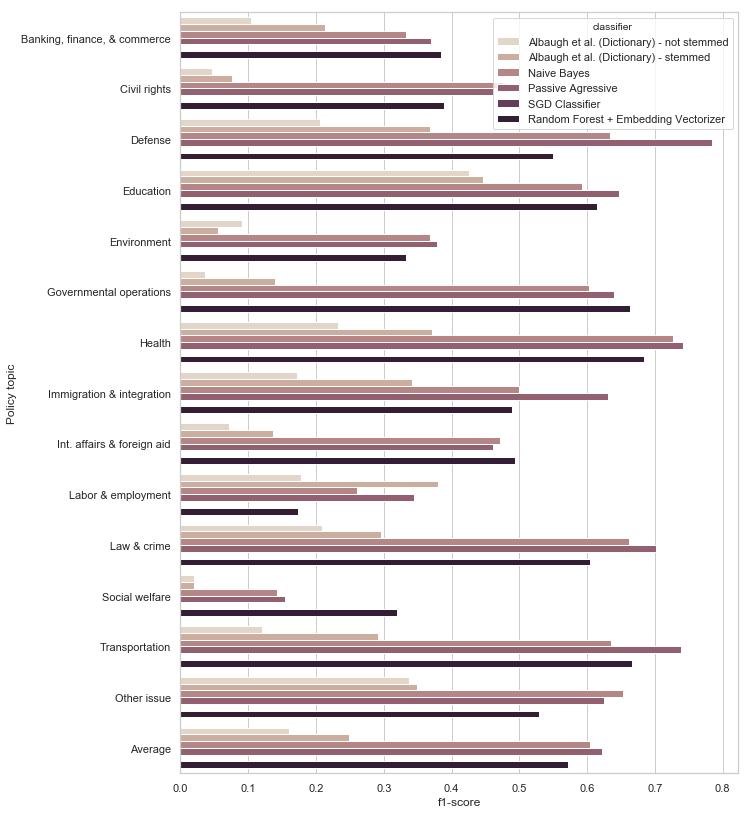

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,14))
sns.set_context('talk')
sns.set(style="whitegrid")

order = ['Banking, finance, & commerce', 'Civil rights',
       'Defense', 'Education', 'Environment', 'Governmental operations',
       'Health', 'Immigration & integration',
       'Int. affairs & foreign aid', 'Labor & employment', 'Law & crime', 
       'Social welfare', 'Transportation','Other issue', 'Average']

hue_order=['Albaugh et al. (Dictionary) - not stemmed', 'Albaugh et al. (Dictionary) - stemmed' ,'Naive Bayes',
       'Passive Agressive', 'SGD Classifier', 'Random Forest + Embedding Vectorizer' ]

ax = sns.barplot(y="Policy topic", x="f1-score", hue = "classifier", order = order, hue_order = hue_order , palette="ch:.25", data=df)

In [82]:
myanalyzer = plot_accuracy_precision_recall(path_to_data = '../output/', path_to_output = '../tables/', sample ='pq_sample_only')
df = myanalyzer.combine_datasets()

2019-10-08 12:51:39,644 : INFO : ../output/precision_recall_f1score_dictionary_stemmedpq_sample_only.json
2019-10-08 12:51:39,656 : INFO : ../output/precision_recall_f1score_dictionary_not_stemmedpq_sample_only.json
2019-10-08 12:51:39,678 : INFO : Results Gridsearch Naive Bayes: 

Alpha: 0.01 
Ngram_range: [1, 1] 

.
2019-10-08 12:51:39,691 : INFO : Results Gridsearch Passive Agressive: 

C: 1.0 
fit intercept: True 
max_iter: 5 
max_loss: squared_hinge 
use idf: True 
vec ngram range: [1, 1]
2019-10-08 12:51:39,715 : INFO : Results Gridsearch SGD Classifier: 

Alpha: 0.001 
max iter: 20 
penalty: l2 

.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:101: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/Library/Frameworks/Py

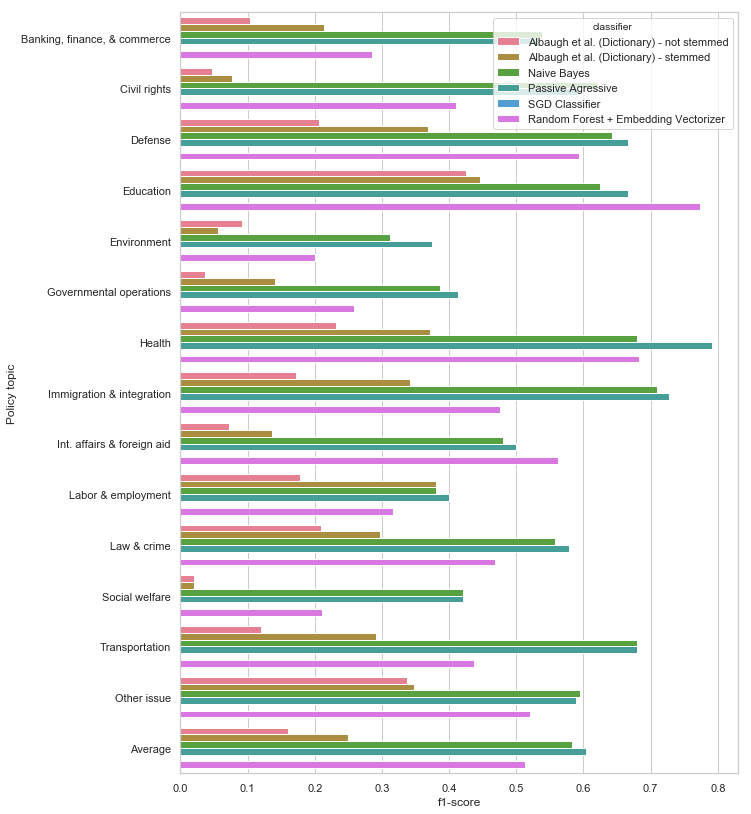

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,14))
sns.set_context('talk')
sns.set(style="whitegrid")

order = ['Banking, finance, & commerce', 'Civil rights',
       'Defense', 'Education', 'Environment', 'Governmental operations',
       'Health', 'Immigration & integration',
       'Int. affairs & foreign aid', 'Labor & employment', 'Law & crime', 
       'Social welfare', 'Transportation','Other issue', 'Average']

hue_order=['Albaugh et al. (Dictionary) - not stemmed', 'Albaugh et al. (Dictionary) - stemmed' ,'Naive Bayes',
       'Passive Agressive', 'SGD Classifier', 'Random Forest + Embedding Vectorizer' ]

ax = sns.barplot(y="Policy topic", x="f1-score", hue = "classifier", order = order, hue_order = hue_order , palette=("husl"), data=df)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import logging

In [37]:

d = {'0': 'Onderwijs',
 '1': 'Burgerrechten en vrijheden',
 '2': 'Justitie, Rechtspraak, Criminaliteit',
 '3': 'Defensie',
 '4': 'Gezondheid',
 '5': 'Gemeenschapsontwikkeling, huisvestingsbeleid en stedelijke planning',
 '6': 'Functioneren democratie en openbaar bestuur',
 '7': 'Macro-economie en belastingen',
 '8': 'Buitenlandse zaken en ontwikkelingssamenwerking',
 '9': 'Ondernemingen, Bankwezen en binnenlandse handel ',
 '10': 'Arbeid',
 '11': 'Verkeer en vervoer',
 '12': 'Overige',
 '13': 'sociale Zaken',
 '14': 'Immigratie en integratie',
 '15': 'Landbouw en Visserij',
 '16': 'Energiebeleid',
 '17': 'Milieu',
 '18': 'Wetenschappelijk onderzoek, technologie en communicatie', 
 'micro avg' : 'Accuracy'}



logger = logging.getLogger()
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level=logging.INFO)

class plot_accuracy_precision_recall():
    '''This prepares a CNN model and runs it'''

    def __init__(self, path_to_data, path_to_output, sample):
        self.path_to_data = path_to_data
        self.path_to_output = path_to_output
        self.sample = sample
        with open('../resources/topic_translation') as handle:
               self.translator = json.loads(handle.read()) 
  #      with open('../resources/numbers_to_topic.json') as handle:
   #            self.translator_numeric = json.loads(handle.read()) 
        
    def get_data_dictionary(self):
         # getting Dictionary Approach Data
        fname = '{}precision_recall_f1score_dictionary_stemmed{}.json'.format(self.path_to_data, self.sample)
        logger.info(fname)
        
        with open(fname) as handle:
            dictdump =  json.loads(handle.read()) 
            
        df = pd.DataFrame.from_dict(dictdump).transpose()
        df['classifier'] = 'Albaugh et al. (Dictionary) - stemmed'

        fname_notstemmed = '{}precision_recall_f1score_dictionary_not_stemmed{}.json'.format(self.path_to_data, self.sample)
        logger.info(fname_notstemmed)

        with open(fname_notstemmed) as handle:
            dictdump =  json.loads(handle.read()) 
            
        df2 = pd.DataFrame.from_dict(dictdump).transpose()
        df2['classifier'] = 'Albaugh et al. (Dictionary) - not stemmed'
        
        df = pd.concat([df, df2])
        df.rename(columns={0 :'precision',  1 :'recall', 2 :'f1-score'}, inplace=True)
        df.rename(index=self.translator, inplace=True)
        df['approach'] = 'Dictionary Approach'
        return df
    
    
    def get_data_cnn(self):
        
        '''create if/else for different samples'''
        
        fname_cnn = '{}precision_recall_f1score_embedding_vectorizer_text_clean{}.json'.format(self.path_to_data, self.sample)
        with open(fname_cnn) as handle:
            data =  json.loads(handle.read()) 
        
        df = pd.DataFrame.from_dict(data).transpose()
        df['approach'] = 'Embedding Vectorizer'
 #       df.rename(index=self.translator, inplace=True)
        df['classifier'] = 'Random Trees + TfidF embedding Vectorizer'
       # df.index = df.index.map(int)
        df.rename(index=d, inplace=True)
        df.rename(index=self.translator, inplace=True)
   #     df = df[['f1-score', 'approach', 'classifier']]
        return df

    
    def get_data_sml(self):
        fname_sml = '{}SML_precision_recall_f1score_text_cleaned_{}.json'.format(self.path_to_data, self.sample)
        with open(fname_sml) as handle:
            class_report =  json.loads(handle.read()) 

        one, two, three, four = class_report
        one = pd.DataFrame(one).transpose()
        one['classifier'] = "Naive Bayes"
        logging.info("Results Gridsearch Naive Bayes: \n\nAlpha: {} \nNgram_range: {} \n\n."
              .format(one['clf__alpha'][one.index=='best estimators:'] [0] , 
                      one['vect__ngram_range'][one.index=='best estimators:'][0]) ) 

        two = pd.DataFrame(two).transpose()
        two['classifier'] = "Passive Agressive"

        logging.info("Results Gridsearch Passive Agressive: \n\nC: {} \nfit intercept: {} \nmax_iter: {} \nmax_loss: {} \nuse idf: {} \nvec ngram range: {}"
              .format(two['clf__C'][two.index=='best estimators:'] [0] , 
                      two['clf__fit_intercept'][two.index=='best estimators:'][0] , 
                      two['clf__max_iter'][two.index=='best estimators:'] [0] , 
                      two['clf__loss'][two.index=='best estimators:'][0] , 
                      two['tfidf__use_idf'][two.index=='best estimators:'] [0] , 
                      two['vect__ngram_range'][two.index=='best estimators:'][0] )  ) 

        three = pd.DataFrame(three).transpose()
        three['classifier'] = "Stochastic Gradient Descent (SGD)"

        logging.info("Results Gridsearch SGD Classifier: \n\nAlpha: {} \nmax iter: {} \npenalty: {} \n\n."
              .format(three['clf__alpha'][one.index=='best estimators:'] [0] , 
                      three['clf__max_iter'][one.index=='best estimators:'][0] , 
                      three['clf__penalty'][one.index=='best estimators:'][0]) ) 
        
        four = pd.DataFrame(four).transpose()
        four['classifier'] = "Support Vector Machines (SVM)"

        df_sml = pd.concat([one, two, three, four])
        df_sml = df_sml[['precision', 'recall', 'f1-score', 'classifier']]
        df_sml.drop(['best estimators:', 'classifier:'], inplace = True)
        df_sml['approach'] = 'SML'
        df_sml.rename(index=self.translator, inplace=True)
        return df_sml

    def combine_datasets(self):
        df1 = self.get_data_dictionary()
        df2 = self.get_data_sml()
        df3 = self.get_data_cnn()
        df = pd.concat([df1, df2, df3])
        df['Policy topic'] = df.index
        df.rename(index={'micro avg': 'Accuracy'}, inplace=True)
        df.replace({'micro avg': 'Accuracy'}, inplace=True)
       # df.drop(['macro avg', 'Average'], inplace = True)
        return df

In [43]:
#import json
#import pandas as pd
#myanalyzer = plot_accuracy_precision_recall(path_to_data = '../output/', path_to_output = '../tables/', sample ='RPA_sample')
#df = myanalyzer.combine_datasets()


myanalyzer = plot_accuracy_precision_recall(path_to_data = '../output/', path_to_output = '../tables/', sample ='newspaper_sample_only')
df = myanalyzer.combine_datasets()

2019-10-14 16:51:10,803 : INFO : ../output/precision_recall_f1score_dictionary_stemmednewspaper_sample_only.json
2019-10-14 16:51:10,816 : INFO : ../output/precision_recall_f1score_dictionary_not_stemmednewspaper_sample_only.json
2019-10-14 16:51:10,837 : INFO : Results Gridsearch Naive Bayes: 

Alpha: 0.01 
Ngram_range: [1, 1] 

.
2019-10-14 16:51:10,849 : INFO : Results Gridsearch Passive Agressive: 

C: 0.5 
fit intercept: True 
max_iter: 5 
max_loss: squared_hinge 
use idf: False 
vec ngram range: [1, 1]
2019-10-14 16:51:10,863 : INFO : Results Gridsearch SGD Classifier: 

Alpha: 0.001 
max iter: 30 
penalty: l2 

.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:121: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/Librar

In [44]:
df.head()

,approach,classifier,f1-score,precision,recall,support,Policy topic
Governmental operations,Dictionary Approach,Albaugh et al. (Dictionary) - stemmed,0.203046,0.615385,0.121581,NaN,Governmental operations
Education,Dictionary Approach,Albaugh et al. (Dictionary) - stemmed,0.589744,0.479167,0.766667,NaN,Education
Civil rights,Dictionary Approach,Albaugh et al. (Dictionary) - stemmed,0.086957,0.272727,0.051724,NaN,Civil rights
Law & crime,Dictionary Approach,Albaugh et al. (Dictionary) - stemmed,0.353846,0.410714,0.310811,NaN,Law & crime
"Banking, finance, & commerce",Dictionary Approach,Albaugh et al. (Dictionary) - stemmed,0.366667,0.407407,0.333333,NaN,"Banking, finance, & commerce"


In [40]:
df.head()

,approach,classifier,f1-score,precision,recall,support,Policy topic
Governmental operations,Dictionary Approach,Albaugh et al. (Dictionary) - stemmed,0.163424,0.461538,0.099291,NaN,Governmental operations
Education,Dictionary Approach,Albaugh et al. (Dictionary) - stemmed,0.461538,0.385135,0.575758,NaN,Education
Civil rights,Dictionary Approach,Albaugh et al. (Dictionary) - stemmed,0.065574,0.352941,0.036145,NaN,Civil rights
Law & crime,Dictionary Approach,Albaugh et al. (Dictionary) - stemmed,0.326622,0.447853,0.257042,NaN,Law & crime
"Banking, finance, & commerce",Dictionary Approach,Albaugh et al. (Dictionary) - stemmed,0.245399,0.294118,0.210526,NaN,"Banking, finance, & commerce"


Text(0.5, 0, '')

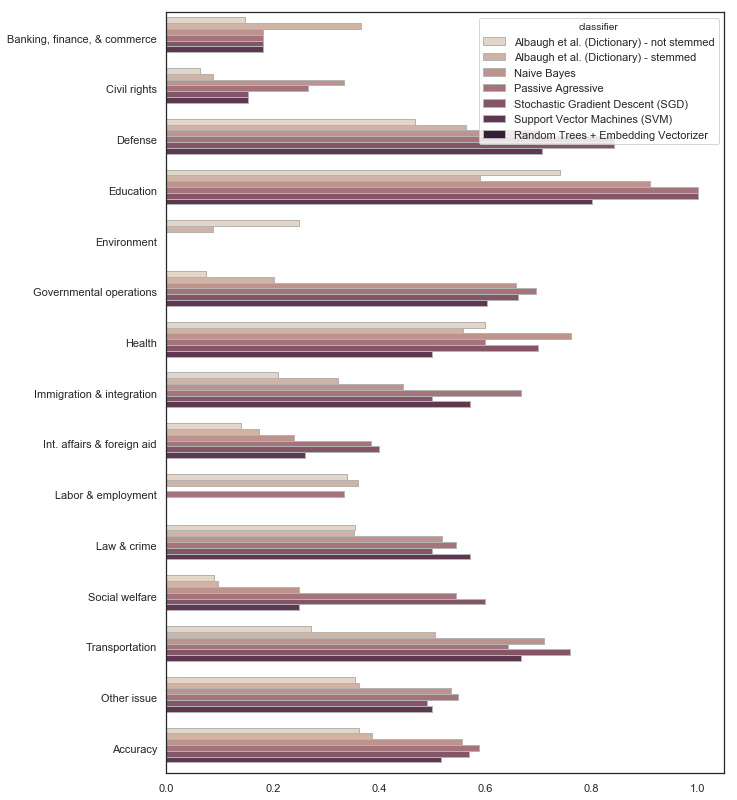

In [45]:
f, ax = plt.subplots(figsize=(10,14))
sns.set_context('talk')
sns.set(style="whitegrid")

order = ['Banking, finance, & commerce', 'Civil rights',
       'Defense', 'Education', 'Environment', 'Governmental operations',
       'Health', 'Immigration & integration',
       'Int. affairs & foreign aid', 'Labor & employment', 'Law & crime', 
       'Social welfare', 'Transportation','Other issue', 'Accuracy']

hue_order=['Albaugh et al. (Dictionary) - not stemmed', 'Albaugh et al. (Dictionary) - stemmed' ,'Naive Bayes',
       'Passive Agressive', 'Stochastic Gradient Descent (SGD)', 'Support Vector Machines (SVM)', 'Random Trees + Embedding Vectorizer' ]

ax = sns.barplot(y="Policy topic", x="f1-score", hue = "classifier", edgecolor=".7", order = order, hue_order = hue_order , palette="ch:.25", data=df)
ax = sns.set_style("white")
plt.title(None)
plt.ylabel(None)
plt.xlabel(None)

In [73]:
PATH_TO_DATA = '~/surfdrive/uva/projects/RPA_KeepingScore/data/'
FILENAME = 'RPA_data_with_dictionaryscores.pkl'

OUTPUT_PATH ='../output/'

def get_data():
    df = pd.read_pickle(PATH_TO_DATA + FILENAME)
    return df

def get_recall_precision(topics, sample):

    true_positives = ["_tp " + str(i) for i in topics]
    false_positives = ["_fp " + str(i) for i in topics]
    false_negatives = ["_fn " + str(i) for i in topics]

    true_positives_st = ["st_tp " + str(i) for i in topics]
    false_positives_st = ["st_fp " + str(i) for i in topics]
    false_negatives_st = ["st_fn " + str(i) for i in topics]

    recall = {}
    precision = {}
    f1score = {}
    accuracy = {}

    recall_stemmed = {}
    precision_stemmed = {}
    f1score_stemmed = {}
    accuracy_stemmed = {}


    df = get_data()

    if sample == 'totalsample':
        df = df
    elif sample == 'newspaper_sample_only':
        df = df[df['type'] == 'newspaper']
    elif sample == 'pq_sample_only' :
        df = df[df['type'] == 'parlementary question']
    elif sample == 'RPA_sample' :
        df = df[df['origin'] == 'RPA']
    elif sample == 'Bjorns_sample' :
        df = df[df['origin'] == 'Bjorn']


    for tp, fp, fn, st_tp, st_fp, st_fn, topic in zip(true_positives, false_positives, false_negatives, true_positives_st, false_positives_st, false_negatives_st, topics) :

        recall[str(topic)] = df[tp].sum(axis=0) / ( df[tp].sum(axis=0) + df[fn].sum(axis=0) )
        precision[str(topic)] = df[tp].sum(axis=0) / ( df[tp].sum(axis=0) + df[fp].sum(axis=0) )
        f1score[str(topic)] = 2 * ( ( precision[str(topic)] * recall[str(topic)] ) / ( precision[str(topic)] + recall[str(topic)] ) )
        accuracy[str(topic)] = 'NaN'

        recall_stemmed[str(topic)] = df[st_tp].sum(axis=0) / ( df[st_tp].sum(axis=0) + df[st_fn].sum(axis=0) )
        precision_stemmed[str(topic)] = df[st_tp].sum(axis=0) / ( df[st_tp].sum(axis=0) + df[st_fp].sum(axis=0) )
        f1score_stemmed[str(topic)] = 2 * ( ( precision_stemmed[str(topic)] * recall_stemmed[str(topic)] ) / ( precision_stemmed[str(topic)] + recall_stemmed[str(topic)] ) )
        accuracy_stemmed[str(topic)] = 'NaN'

    recall['total'] = sum(recall.values()) / len(recall.values())
    precision['total'] = sum(precision.values()) / len(precision.values())
    f1score['total'] = sum(f1score.values()) / len(f1score.values())
    accuracy['total'] = accuracy_score(df['main_topic_label'], df['topic_label_dictionary'], normalize=True, sample_weight=None)
    print(accuracy['total'])

    recall_stemmed['total'] = sum(recall_stemmed.values()) / len(recall_stemmed.values())
    precision_stemmed['total'] = sum(precision_stemmed.values()) / len(precision_stemmed.values())
    f1score_stemmed['total'] = sum(f1score_stemmed.values()) / len(f1score_stemmed.values())
    accuracy['total'] = accuracy_score(df['main_topic_label'], df['stemmed_topic_label_dictionary'], normalize=True, sample_weight=None)

   # return recall, precision, f1score, accuracy, recall_stemmed, precision_stemmed, f1score_stemmed, accuracy_stemmed


In [72]:
get_precision_recall_f1score_FRAMES_SML.py

['text_x',
 'topic',
 'main_topic_label',
 'attrresp',
 'attrresp_wrds',
 'hmnintrst',
 'hmnintrst_wrds',
 'cnflct',
 'cnflct_wrds',
 'ecnmc',
 'ecnmc_wrds',
 'type',
 'origin',
 'documentnr',
 'topic_label_dictionary',
 'index_words',
 'smallest_index',
 'len matches',
 'words matches',
 'text_y',
 'stemmed_topic_label_dictionary',
 'stemmed_index_words',
 'stemmed_smallest_index',
 'stemmed_len matches',
 'stemmed_words matches',
 'stemmed_text',
 'topic_label_dictionary_minmatches',
 'topic_label_dictionary_minmatches_stem',
 '_tp Functioneren democratie en openbaar bestuur',
 '_fp Functioneren democratie en openbaar bestuur',
 '_fn Functioneren democratie en openbaar bestuur',
 '_tn Functioneren democratie en openbaar bestuur',
 'st_tp Functioneren democratie en openbaar bestuur',
 'st_fp Functioneren democratie en openbaar bestuur',
 'st_fn Functioneren democratie en openbaar bestuur',
 'st_tn Functioneren democratie en openbaar bestuur',
 '_tp Onderwijs',
 '_fp Onderwijs',
 '_fn 

In [359]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,  TfidfTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
import logging
import json

PATH_TO_DATA = '~/surfdrive/uva/projects/RPA_KeepingScore/data/'
FILENAME = 'RPA_and_Buschers_data_with_dictionaryscores.pkl'

OUTPUT_PATH ='../output/'

def get_data():
    df = pd.read_pickle(PATH_TO_DATA + FILENAME)
    return df

def gridsearch_with_classifiers(sample):

    df = get_data()

    logging.info('getting the data. keeping sample: {}'.format(sample))

    if sample == 'totalsample':
        df = df
    elif sample == 'newspaper_sample_only':
        df = df[df['type'] == 'newspaper']
    elif sample == 'pq_sample_only' :
        df = df[df['type'] == 'parlementary question']
    elif sample == 'RPA_sample' :
        df = df[df['origin'] == 'RPA']
    elif sample == 'Bjorns_sample' :
        df = df[df['origin'] == 'Bjorn']

    logging.info('total size df: {}'.format(len(df)))
    X_train , X_test , y_train , y_test = train_test_split (df['text_x'], df['main_topic_label'], test_size = 0.2 , random_state =42)

    class_report = []
    results = []

    names = [
             "Naive Bayes",
             "Passive Agressive",
             "SGDClassifier"
            ]

    classifiers = [
        MultinomialNB(),
        PassiveAggressiveClassifier(),
        SGDClassifier(),
    ]

    parameters = [
                 {'vect__ngram_range': [(1, 1), (1, 2)],
                  'clf__alpha': (1e-2, 1e-3, 1e-5)},

                {

                'clf__loss': ('hinge', 'squared_hinge'),
                'clf__C': (0.01, 0.5, 1.0)   ,
                'clf__fit_intercept': (True, False) ,
                'vect__ngram_range': [(1, 1), (1, 2)] ,
                'tfidf__use_idf' :(True ,False),
                'clf__max_iter': (5 ,10 ,15)

                } ,

                  {'clf__max_iter': (20, 30) ,
                   'clf__alpha': (1e-2, 1e-3, 1e-5),
                   'clf__penalty': ('l2', 'elasticnet')}
                 ]


    for name, classifier, params in zip(names, classifiers, parameters):
        my_dict = {}
        print(name)
        print(classifier)
        print(params)
        clf_pipe = Pipeline([
            ('vect', TfidfVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('clf', classifier),
        ])

        gs_clf = GridSearchCV(clf_pipe, param_grid=params, n_jobs=-1, cv=3)
        logger.info("Starting gridsearch....")
        clf = gs_clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        print("{} score: {}".format(name, score))
        print("{} are the best estimators".format(clf.best_estimator_))

        results_to_dict = classification_report((clf.best_estimator_.predict(X_test)), y_test, output_dict= True)

        results_to_dict['classifier:'] = name
        results_to_dict['best estimators:'] = clf.best_params_

        print("Created dictionary with classification report: \n\n{}".format(results_to_dict))

        y_hats = clf.predict(X_test)

        my_dict = {"predicted": y_hats,
                   "actual" : y_test.values,
                   "classifier" : name}

        results.append(my_dict)
        class_report.append(results_to_dict)
        
    return class_report, results
   # results_to_dict = metrics.classification_report((clf.best_estimator_.predict(X_test), y_test), output_dict=True )
    #print(classification_report(, y_pred, target_names=target_names))


In [360]:
def get_scores(sample):
    class_report, results = gridsearch_with_classifiers(sample)
    fname_accuracy = '{}SML_precision_recall_f1score{}.json'.format(OUTPUT_PATH, sample)
    output = pd.DataFrame.from_dict(data)
    return output, class_report
  #  output.to_json(fname_accuracy)

In [361]:
output, class_report = get_scores(sample="pq_sample_only")

2019-09-26 15:10:39,289 : INFO : getting the data. keeping sample: pq_sample_only
2019-09-26 15:10:39,359 : INFO : total size df: 1753
2019-09-26 15:10:39,382 : INFO : Starting gridsearch....


Naive Bayes
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
{'vect__ngram_range': [(1, 1), (1, 2)], 'clf__alpha': (0.01, 0.001, 1e-05)}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: Undefin

Naive Bayes score: 0.5555555555555556
Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...near_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True))]) are the best estimators
Created dictionary with classification report: 

{'Arbeid': {'precision': 0.4666666666666667, 'recall': 0.6363636363636364, 'f1-score': 0.5384615384615385, 'support': 11}, 'Buitenlandse zaken en ontwikkelingssamenwerking': {'precision': 0.6666666666666666, 'recall': 0.5882352941176471, 'f1-score': 0.625, 'support': 34}, 'Burgerrechten en vrijheden': {'precision': 0.6538461538461539, 'recall': 0.6071428571428571, 'f1-score': 0.6296296296296297, 'support': 28}, 'Defensie': {'precision': 0.25, 'recall': 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.

Passive Agressive score: 0.6011396011396012
Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False))]) are the best estimators
Created dictionary with classification report: 

{'Arbeid': {'precision': 0.5333333333333333, 'recall': 0.6153846153846154, 'f1-score': 0.5714285714285715, 'support': 13}, 'Buitenlandse zaken en ontwikkelingssamenwerking': {'precision': 0.5666666666666667, 'recall': 0.6071428571428571, 'f1-score': 0.5862068965517241, 'support': 28}, 'Burgerrechten en vrijheden': {'precision': 0.7692307692307693, 'recall': 0.6060606060606061, 'f1-score': 0.6779661016949152, 'support': 33}, 'Defensie': {'precision

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier score: 0.6011396011396012
Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))]) are the best estimators
Created dictionary with classification report: 

{'Arbeid': {'precision': 0.5333333333333333, 'recall': 0.6666666666666666, 'f1-score': 0.5925925925925926, 'support': 12}, 'Buitenlandse zaken en ontwikkelingssamenwerking': {'precision': 0.5666666666666667, 'recall': 0.6071428571428571, 'f1-score': 0.5862068965517241, 'support': 28}, 'Burgerrechten en vrijheden': {'precision': 0.7307692307692307, 'recall': 0.6785714285714286, 'f1-score': 0.7037037037037038, 'support': 28}, 'Defensie': {'precision': 0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [291]:
PATH = '/Users/anne/surfdrive/uva/projects/RPA_KeepingScore/data/RPA_data_with_dictionaryscores.pkl'
df = pd.read_pickle(PATH)
train, test = train_test_split(df, random_state=42, test_size=0.2, shuffle=True)

att = train['attrresp_wrds'].dropna().to_list()


In [290]:
att[4]

'Staatssecretaris, aan banden leggen, overheidsregulering'

In [292]:
flat_list = [item for sublist in att  for item in sublist]

In [97]:
d1 = pd.DataFrame(recall, index=['recall dictionary'])
d2 = pd.DataFrame(d_deeplearning_recall, index=['recall deeplearning'])
d = pd.concat([d1, d2]).transpose()
d['topic'] = d.index

d = pd.melt(d, id_vars=['topic'], value_vars=['recall dictionary', 'recall deeplearning'], var_name = 'Classifier', value_name='recall')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


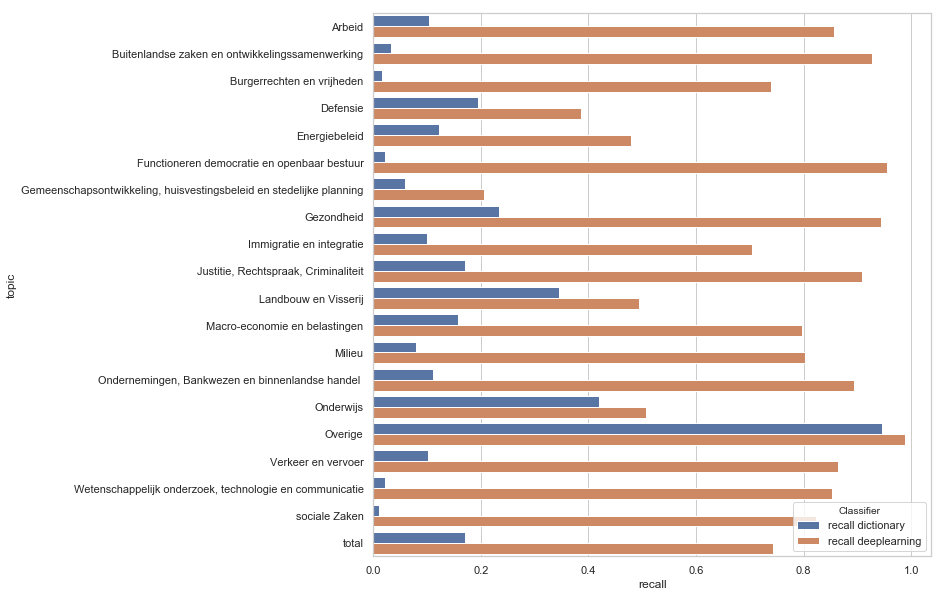

In [104]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10,10))

sns.set(style="whitegrid")
ax = sns.barplot(y="topic", x= "recall", hue = "Classifier", data=d)

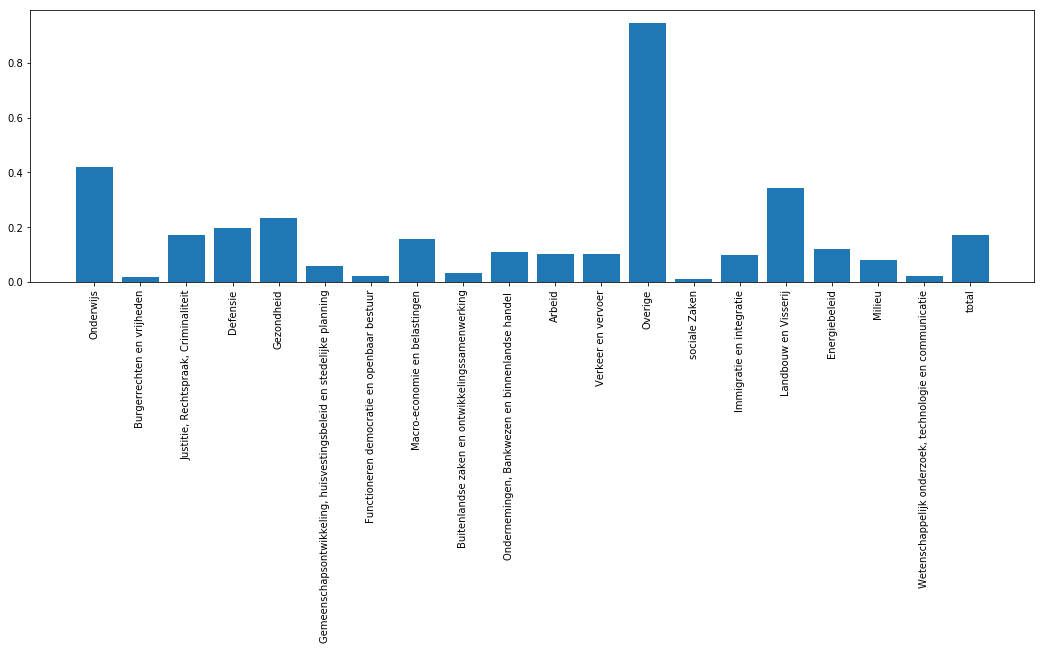

In [55]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(18,5))
plt.bar(range(len(recall)), recall.values(), align="center")
plt.xticks(range(len(recall)), list(recall.keys()))
plt.xticks(rotation=90)
plt.show()


In [106]:
import pandas as pd
pd.__version__

'0.25.0'

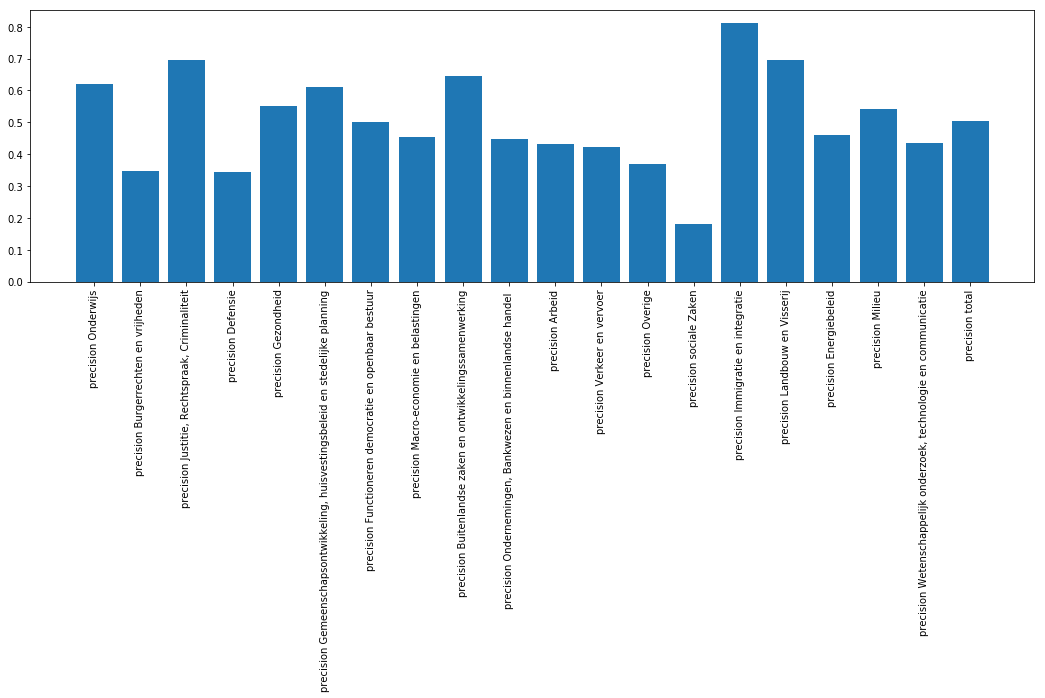

In [50]:
f, ax = plt.subplots(figsize=(18,5))
plt.bar(range(len(precision)), precision.values(), align="center")
plt.xticks(range(len(precision)), list(precision.keys()))
plt.xticks(rotation=90)
plt.show()


In [749]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,  TfidfTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
import logging
import json


PATH_TO_DATA = '~/surfdrive/uva/projects/RPA_KeepingScore/data/'
#FILENAME = 'RPA_and_Buschers_data_with_dictionaryscores.pkl'
FILENAME = 'RPA_data_with_dictionaryscores.pkl'


OUTPUT_PATH ='../output/'

def get_data():
    df = pd.read_pickle(PATH_TO_DATA + FILENAME)
    return df

def gridsearch_with_classifiers(sample):

    df = get_data()

    logging.info('getting the data. keeping sample: {}'.format(sample))

    if sample == 'totalsample':
        df = df
    elif sample == 'newspaper_sample_only':
        df = df[df['type'] == 'newspaper']
    elif sample == 'pq_sample_only' :
        df = df[df['type'] == 'parlementary question']
    elif sample == 'RPA_sample' :
        df = df[df['origin'] == 'RPA']
    elif sample == 'Bjorns_sample' :
        df = df[df['origin'] == 'Bjorn']

    logging.info('total size df: {}'.format(len(df)))
    X_train , X_test , y_train , y_test = train_test_split (df['text_x'], df['main_topic_label'], test_size = 0.2 , random_state =1)

    class_report = []
    results = []

    names = [
             "Naive Bayes",
             "Passive Agressive",
             "SGDClassifier"
            ]

    classifiers = [
        MultinomialNB(),
        PassiveAggressiveClassifier(),
        SGDClassifier(),
    ]

    parameters = [
                 {'vect__ngram_range': [(1, 1), (1, 2)],
                  'clf__alpha': (1e-2, 1e-3, 1e-5)},

                {

                'clf__loss': ('hinge', 'squared_hinge'),
                'clf__C': (0.01, 0.5, 1.0)   ,
                'clf__fit_intercept': (True, False) ,
                'vect__ngram_range': [(1, 1), (1, 2)] ,
                'tfidf__use_idf' :(True ,False),
                'clf__max_iter': (5 ,10 ,15)

                } ,

                  {'clf__max_iter': (20, 30) ,
                   'clf__alpha': (1e-2, 1e-3, 1e-5),
                   'clf__penalty': ('l2', 'elasticnet')}
                 ]


    for name, classifier, params in zip(names, classifiers, parameters):
        my_dict = {}
        print(name)
        print(classifier)
        print(params)
        clf_pipe = Pipeline([
            ('vect', TfidfVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('clf', classifier),
        ])

        gs_clf = GridSearchCV(clf_pipe, param_grid=params, n_jobs=-1, cv=3)
        logger.info("Starting gridsearch....")
        clf = gs_clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        print("{} score: {}".format(name, score))
        print("{} are the best estimators".format(clf.best_estimator_))

        results_to_dict = classification_report((clf.best_estimator_.predict(X_test)), y_test, output_dict= True)

        results_to_dict['classifier:'] = name
        results_to_dict['best estimators:'] = clf.best_params_

        print("Created dictionary with classification report: \n\n{}".format(results_to_dict))

        y_hats = clf.predict(X_test)

        my_dict = {"predicted": y_hats,
                   "actual" : y_test.values  ,
                    "classifier" : name}

        results.append(my_dict)
        class_report.append(results_to_dict)

    return class_report, results
   # results_to_dict = metrics.classification_report((clf.best_estimator_.predict(X_test), y_test), output_dict=True )
    #print(classification_report(, y_pred, target_names=target_names))

def get_scores(sample):
    class_report, results = gridsearch_with_classifiers(sample)
    fname_accuracy = '{}SML_precision_recall_f1score{}.json'.format(OUTPUT_PATH, sample)
    fname_predictions = '{}SML_predicted_actual_{}.json'.format(OUTPUT_PATH, sample)

    with open(fname_accuracy, mode = 'w') as fo:
        json.dump(class_report, fo)

    data = pd.DataFrame.from_dict(results)

    predicted = data.predicted.apply(pd.Series) \
        .merge(data, right_index = True, left_index = True) \
        .drop(["predicted"], axis = 1) \
        .melt(id_vars = ['classifier'], value_name = "Predicted label")

    actual = data.actual.apply(pd.Series) \
        .merge(data, right_index = True, left_index = True) \
        .drop(["predicted"], axis = 1) \
        .melt(id_vars = ['classifier'], value_name = "Actual label")

    df = pd.merge(predicted, actual, how = 'inner', left_index = True, right_index = True)

    df['Classifier'] = df['classifier_x']
    df = df[df.variable_x != 'actual']
    df = df[['Predicted label', 'Actual label', 'Classifier']]

    df.to_json(fname_predictions)

#class_report, results = get_scores(sample="pq_sample_only")
if __name__ == "__main__":

    logger = logging.getLogger()
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
    logging.root.setLevel(level=logging.INFO)

#    get_scores(sample="totalsample")
#    get_scores(sample="newspaper_sample_only")
#    get_scores(sample="pq_sample_only")
    get_scores(sample="RPA_sample")
#    get_scores(sample="Bjorns_sample")

   # results_to_dict = metrics.classification_report((clf.best_estimator_.predict(X_test), y_test), output_dict=True )
    #print(classification_report(, y_pred, target_names=target_names))

2019-10-02 14:13:56,532 : INFO : getting the data. keeping sample: RPA_sample
2019-10-02 14:13:56,541 : INFO : total size df: 2866
2019-10-02 14:13:56,546 : INFO : Starting gridsearch....


Naive Bayes
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
{'vect__ngram_range': [(1, 1), (1, 2)], 'clf__alpha': (0.01, 0.001, 1e-05)}


TypeError: '<' not supported between instances of 'NoneType' and 'str'

In [341]:
d = { 'Dictionary - stemmed':'Dictionary - stemmed',
     'Dictionary - not stemmed':  'Dictionary - not stemmed',
     'SVC count embedding': 'Support Vector Machines (SVM) ~ w2v count',
      'SVC tfidf embedding':  'Support Vector Machines (SVM) ~ w2v tfidf',
     'ET count':  'ExtraTrees ~ count',
    'ET tfidf':  'ExtraTrees ~ tfidf',
    'ET count embedding' : 'ExtraTrees ~ w2v count',
    'SVC tfidf': 'Support Vector Machines (SVM) ~ tfidf',
    'SVC count': 'Support Vector Machines (SVM) ~ count',
        'ET tifdf embedding':  'ExtraTrees ~ w2v tfidf',
        'PA tfidf': 'Passive Agressive ~ tfidf',
        'PA count': 'Passive Agressive ~ count',
        'PA count embedding': 'Passive Agressive ~ w2v count',
        'PA tfidf embedding':  'Passive Agressive ~ w2v tfidf',
     'SGD count': 'Stochastic Gradient Descent (SGD) ~ count',
     'SGD count embedding' : 'Stochastic Gradient Descent (SGD) ~ w2v count',
     'SGD tfidf' : 'Stochastic Gradient Descent (SGD) ~ tfidf',
     'SGD tfidf embedding' : 'Stochastic Gradient Descent (SGD) ~ w2v tfidf' }

In [346]:
for k, v in d.items():
    print("'", v, "'", ",","'", k, "'")

' Dictionary - stemmed ' , ' Dictionary - stemmed '
' Dictionary - not stemmed ' , ' Dictionary - not stemmed '
' Support Vector Machines (SVM) ~ w2v count ' , ' SVC count embedding '
' Support Vector Machines (SVM) ~ w2v tfidf ' , ' SVC tfidf embedding '
' ExtraTrees ~ count ' , ' ET count '
' ExtraTrees ~ tfidf ' , ' ET tfidf '
' ExtraTrees ~ w2v count ' , ' ET count embedding '
' Support Vector Machines (SVM) ~ tfidf ' , ' SVC tfidf '
' Support Vector Machines (SVM) ~ count ' , ' SVC count '
' ExtraTrees ~ w2v tfidf ' , ' ET tifdf embedding '
' Passive Agressive ~ tfidf ' , ' PA tfidf '
' Passive Agressive ~ count ' , ' PA count '
' Passive Agressive ~ w2v count ' , ' PA count embedding '
' Passive Agressive ~ w2v tfidf ' , ' PA tfidf embedding '
' Stochastic Gradient Descent (SGD) ~ count ' , ' SGD count '
' Stochastic Gradient Descent (SGD) ~ w2v count ' , ' SGD count embedding '
' Stochastic Gradient Descent (SGD) ~ tfidf ' , ' SGD tfidf '
' Stochastic Gradient Descent (SGD) ~ w2

2019-11-06 11:59:51,155 : INFO : ../output/precision_recall_f1score_dictionary_stemmednewspaper_sample_only.json
2019-11-06 11:59:51,161 : INFO : ../output/precision_recall_f1score_dictionary_not_stemmednewspaper_sample_only.json
2019-11-06 11:59:51,187 : INFO : Results Gridsearch Passive Agressive: 

C: 0.01 
fit intercept: False 
max_iter: 5  
loss: hinge
2019-11-06 11:59:51,210 : INFO : Results Gridsearch SGD Classifier: 

Alpha: 0.01 
max iter: 30 
penalty: elasticnet 

.
2019-11-06 11:59:51,226 : INFO : Results Gridsearch SVM Classifier: 

C: 10 
gamma: 0.001 
kernel: rbf 

.
2019-11-06 11:59:51,243 : INFO : Results Gridsearch ExtraTrees: 

Max features:auto
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:109: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and sil

{'Functioneren democratie en openbaar bestuur': {'precision': 0.8548387096774194, 'recall': 0.4953271028037383, 'f1-score': 0.6272189349112426, 'support': 107}, 'weighted avg': {'precision': 0.6321309711649804, 'recall': 0.47533632286995514, 'f1-score': 0.5201095962748056, 'support': 223}, 'Gezondheid': {'precision': 0.3333333333333333, 'recall': 0.8, 'f1-score': 0.47058823529411764, 'support': 5}, 'Defensie': {'precision': 0.36363636363636365, 'recall': 0.6666666666666666, 'f1-score': 0.4705882352941177, 'support': 6}, 'sociale Zaken': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, 'Milieu': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'best estimators:': {'clf__max_features': 'auto'}, 'Overige': {'precision': 0.5945945945945946, 'recall': 0.43137254901960786, 'f1-score': 0.5000000000000001, 'support': 51}, 'Buitenlandse zaken en ontwikkelingssamenwerking': {'precision': 0.3157894736842105, 'recall': 0.5454545454545454, 'f1-score': 0.39999999999

2019-11-06 11:59:51,395 : INFO : Results Gridsearch SVM Classifier: 

C: 100 
gamma: 0.0001 
kernel: rbf 

.
2019-11-06 11:59:51,407 : INFO : Results Gridsearch ExtraTrees: 

Max features:auto
2019-11-06 11:59:51,446 : INFO : Results Gridsearch Passive Agressive: 

C: 0.01 
fit intercept: True 
max_iter: 15  
loss: squared_hinge
2019-11-06 11:59:51,460 : INFO : Results Gridsearch SGD Classifier: 

Alpha: 0.01 
max iter: 30 
penalty: l2 

.
2019-11-06 11:59:51,472 : INFO : Results Gridsearch SVM Classifier: 

C: 10 
gamma: 0.001 
kernel: rbf 

.
2019-11-06 11:59:51,482 : INFO : Results Gridsearch ExtraTrees: 

Max features:auto


{'Milieu': {'precision': 0.0, 'support': 0, 'recall': 0.0, 'f1-score': 0.0}, 'Ondernemingen, Bankwezen en binnenlandse handel ': {'precision': 0.1111111111111111, 'support': 2, 'recall': 0.5, 'f1-score': 0.1818181818181818}, 'Justitie, Rechtspraak, Criminaliteit': {'precision': 0.3076923076923077, 'support': 7, 'recall': 0.5714285714285714, 'f1-score': 0.4}, 'Verkeer en vervoer': {'precision': 0.125, 'support': 5, 'recall': 0.4, 'f1-score': 0.19047619047619047}, 'classifier:': 'ET', 'Overige': {'precision': 0.4594594594594595, 'support': 52, 'recall': 0.3269230769230769, 'f1-score': 0.3820224719101124}, 'Burgerrechten en vrijheden': {'precision': 0.0, 'support': 5, 'recall': 0.0, 'f1-score': 0.0}, 'Arbeid': {'precision': 0.1111111111111111, 'support': 4, 'recall': 0.25, 'f1-score': 0.15384615384615383}, 'weighted avg': {'precision': 0.6447405185558703, 'support': 223, 'recall': 0.4439461883408072, 'f1-score': 0.4935491482972748}, 'sociale Zaken': {'precision': 0.0, 'support': 1, 'recal

2019-11-06 11:59:51,719 : WARNING : No handles with labels found to put in legend.


Saved figure as: ../figures/classification_topics


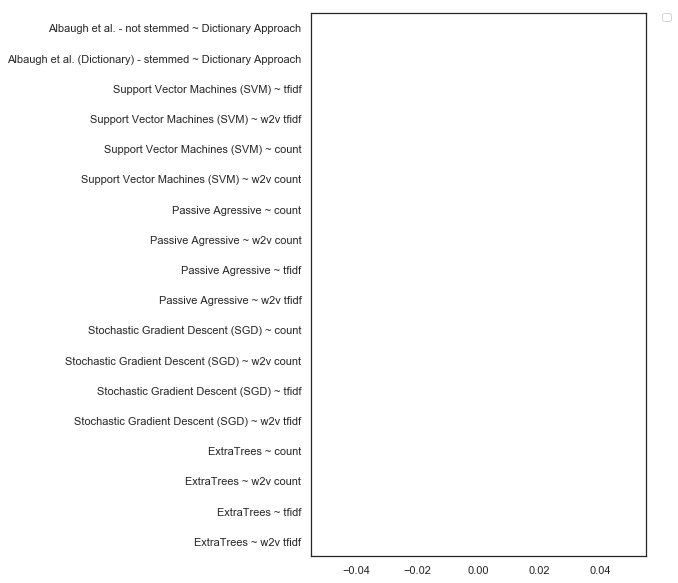

In [348]:
import seaborn as sns
import matplotlib.pyplot as plt
import json
import logging
import pandas as pd

d = {'0': 'Onderwijs',
 '1': 'Burgerrechten en vrijheden',
 '2': 'Justitie, Rechtspraak, Criminaliteit',
 '3': 'Defensie',
 '4': 'Gezondheid',
 '5': 'Gemeenschapsontwikkeling, huisvestingsbeleid en stedelijke planning',
 '6': 'Functioneren democratie en openbaar bestuur',
 '7': 'Macro-economie en belastingen',
 '8': 'Buitenlandse zaken en ontwikkelingssamenwerking',
 '9': 'Ondernemingen, Bankwezen en binnenlandse handel ',
 '10': 'Arbeid',
 '11': 'Verkeer en vervoer',
 '12': 'Overige',
 '13': 'sociale Zaken',
 '14': 'Immigratie en integratie',
 '15': 'Landbouw en Visserij',
 '16': 'Energiebeleid',
 '17': 'Milieu',
 '18': 'Wetenschappelijk onderzoek, technologie en communicatie',
 'macro avg' : 'Accuracy'}

logger = logging.getLogger()
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level=logging.INFO)

class plot_accuracy_precision_recall():
    '''This prepares a CNN model and runs it'''

    def __init__(self, path_to_data, path_to_output, sample):
        self.path_to_data = path_to_data
        self.path_to_output = path_to_output
        self.sample = sample
        with open('../resources/topic_translation') as handle:
               self.translator = json.loads(handle.read())
  #      with open('../resources/numbers_to_topic.json') as handle:
   #            self.translator_numeric = json.loads(handle.read())

    def get_data_dictionary(self):
         # getting Dictionary Approach Data
        fname = '{}precision_recall_f1score_dictionary_stemmed{}.json'.format(self.path_to_data, self.sample)
        logger.info(fname)

        with open(fname) as handle:
            dictdump =  json.loads(handle.read())

        df = pd.DataFrame.from_dict(dictdump).transpose()
        df['classifier'] = 'Albaugh et al. (Dictionary) - stemmed'

        fname_notstemmed = '{}precision_recall_f1score_dictionary_not_stemmed{}.json'.format(self.path_to_data, self.sample)
        logger.info(fname_notstemmed)

        with open(fname_notstemmed) as handle:
            dictdump =  json.loads(handle.read())

        df2 = pd.DataFrame.from_dict(dictdump).transpose()
        df2['classifier'] = 'Albaugh et al. - not stemmed'

        df = pd.concat([df, df2])
        df.rename(columns={0 :'precision',  1 :'recall', 2 :'f1-score'}, inplace=True)
        df.rename(index=self.translator, inplace=True)
        df['approach'] = 'Dictionary Approach'
        return df


    def get_data_sml(self, vect):
        fname_sml = '{}sml_vectorizers_final/SML_precision_recall_f1score_text_cleaned_{}_{}.json'.format(self.path_to_data, self.sample, vect)
        fname_sml= fname_sml
        with open(fname_sml) as handle:
            class_report =  json.loads(handle.read())

        one, two, three, four = class_report
        print(four)
        one = pd.DataFrame(one).transpose()
        one['classifier'] = "Passive Agressive"
        logging.info("Results Gridsearch Passive Agressive: \n\nC: {} \nfit intercept: {} \nmax_iter: {}  \nloss: {}"
              .format(one['clf__C'][one.index=='best estimators:'] [0] ,
                      one['clf__fit_intercept'][one.index=='best estimators:'][0] ,
                      one['clf__max_iter'][one.index=='best estimators:'] [0] ,
                      one['clf__loss'][one.index=='best estimators:'][0]  )  )

  
        two = pd.DataFrame(two).transpose()
        two['classifier'] = "Stochastic Gradient Descent (SGD)"

        logging.info("Results Gridsearch SGD Classifier: \n\nAlpha: {} \nmax iter: {} \npenalty: {} \n\n."
              .format(two['clf__alpha'][two.index=='best estimators:'] [0] ,
                    two['clf__max_iter'][two.index=='best estimators:'][0] ,
                    two['clf__penalty'][two.index=='best estimators:'][0]) )

        three = pd.DataFrame(three).transpose()
        three['classifier'] = "Support Vector Machines (SVM)"
        
        logging.info("Results Gridsearch SVM Classifier: \n\nC: {} \ngamma: {} \nkernel: {} \n\n."
                      .format(three['clf__C'][three.index=='best estimators:'] [0] ,
                              three['clf__gamma'][three.index=='best estimators:'] [0] ,
                              three['clf__kernel'][three.index=='best estimators:'] [0] ))
                              
        four = pd.DataFrame(four).transpose()
        four['classifier'] = "ExtraTrees"

        logging.info("Results Gridsearch ExtraTrees: \n\nMax features:{}".format(four['clf__max_features'][four.index=='best estimators:'] [0]  ))

        df_sml = pd.concat([one, two, three, four])
        df_sml = df_sml[['precision', 'recall', 'f1-score', 'classifier']]
        df_sml.drop(['best estimators:', 'classifier:'], inplace = True)
        df_sml['approach'] = 'SML'
        df_sml.rename(index=self.translator, inplace=True)
        return df_sml

    def combine_datasets(self):
        df1 = self.get_data_dictionary()
        df2 = self.get_data_sml(vect='w2v_tfidf')
        df2['approach'] = 'w2v tfidf'
        df3 = self.get_data_sml(vect='tfidf')
        df3['approach'] = 'tfidf'
        df4 = self.get_data_sml(vect='w2v_count')
        df4['approach'] = 'w2v count'
        df5 = self.get_data_sml(vect='count')
        df5['approach'] = 'count'
        df = pd.concat([df1, df2, df3, df4, df5])
        df['Policy topic'] = df.index
        df.rename(index={'Average': 'Accuracy'}, inplace=True)
        df.replace({'Average': 'Accuracy'}, inplace=True)
       # df.drop(['macro avg', 'Average'], inplace = True)
        return df


def get_figure_and_save():
    myanalyzer = plot_accuracy_precision_recall(path_to_data = '../output/', path_to_output = '../tables/', sample ='newspaper_sample_only')
    df = myanalyzer.combine_datasets()
    fname = '{}classification_topics'.format('../figures/')
    
    df['classifier + vectorizer'] = df['classifier'].astype(str) + " ~ " + df['approach'].astype(str) 
    accuracy = df[df['Policy topic'] == 'Accuracy']
    accuracy = df[df['Policy topic'] == 'Accuracy']
    approach = accuracy["approach"]
    
    final_recode = {'Albaugh et al. - not stemmed ~ Dictionary Approach' : 'Albaugh et al. - not stemmed (dictionary)' ,
     'Albaugh et al. (Dictionary) - stemmed ~ Dictionary Approach' : 'Albaugh et al. - stemmed (dictionary)' ,
     'Support Vector Machines (SVM) ~ w2v count': 'SVM count embedding' ,
     'Support Vector Machines (SVM) ~ w2v tfidf' : 'SVM tfidf embedding' ,
     'ExtraTrees ~ count' : 'ET count',
     'ExtraTrees ~ tfidf' : 'ET tfidf',
     'ExtraTrees ~ w2v count' : 'ET count embedding',
     'Support Vector Machines (SVM) ~ tfidf' : 'SVC tfidf',
     'Support Vector Machines (SVM) ~ count' :  'SVC count',
     'ExtraTrees ~ w2v tfidf' :  'ET tifdf embedding',
     'Passive Agressive ~ tfidf' :  'PA tfidf',
     'Passive Agressive ~ count' :  'PA count',
     'Passive Agressive ~ w2v count' :  'PA count embedding',
     'Passive Agressive ~ w2v tfidf' :  'PA tfidf embedding',
     'Stochastic Gradient Descent (SGD) ~ count' :  'SGD count',
     'Stochastic Gradient Descent (SGD) ~ w2v count' : 'SGD count embedding',
     'Stochastic Gradient Descent (SGD) ~ tfidf' : 'SGD tfidf',
     'Stochastic Gradient Descent (SGD) ~ w2v tfidf' : 'SGD tfidf embedding'}

    df['classifier_updated'] = df['classifier + vectorizer'].map(final_recode)
    
    colour = ['whitesmoke' if x=='w2v tfidf' else 'dimgray' if x== 'w2v count' else 'black' if x== 'count' else 'silver' if x== 'tfidf' else 'white' for x in approach ]
    print(colour)

    f, ax = plt.subplots(figsize=(6,10))
    sns.set_context('talk')
    sns.set(style="whitegrid")
    
    order = ['Albaugh et al. - not stemmed ~ Dictionary Approach',
     'Albaugh et al. (Dictionary) - stemmed ~ Dictionary Approach',
     'Support Vector Machines (SVM) ~ tfidf',
     'Support Vector Machines (SVM) ~ w2v tfidf',
     'Support Vector Machines (SVM) ~ count',
     'Support Vector Machines (SVM) ~ w2v count',
     'Passive Agressive ~ count',
     'Passive Agressive ~ w2v count',
     'Passive Agressive ~ tfidf',
     'Passive Agressive ~ w2v tfidf',
     'Stochastic Gradient Descent (SGD) ~ count',
     'Stochastic Gradient Descent (SGD) ~ w2v count',
     'Stochastic Gradient Descent (SGD) ~ tfidf',
     'Stochastic Gradient Descent (SGD) ~ w2v tfidf',
     'ExtraTrees ~ count',
     'ExtraTrees ~ w2v count',
     'ExtraTrees ~ tfidf',
     'ExtraTrees ~ w2v tfidf']
    
    ax = sns.barplot(y="classifier_updated", x="f1-score",edgecolor=".4", palette=colour, order=order, data=df[df['Policy topic'] == 'Accuracy'])
    ax = sns.set_style("white")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(None)
    plt.ylabel(None)
    plt.xlabel(None)
    plt.savefig(fname, bbox_inches = 'tight')
    print('Saved figure as: {}'.format(fname))
    return df

df = get_figure_and_save()

In [356]:

 
'SGD tfidf embedding', , 'ET tifdf embedding',
       'PA tfidf', 'SGD tfidf', 'SVC tfidf', 'ET tfidf',
       'PA count embedding', 'SGD count embedding', 'SVM count embedding',
       'ET count embedding', 'PA count', 'SGD count', 'SVC count',
       'ET count']

,precision,recall,f1-score,classifier,approach,Policy topic,classifier + vectorizer
classifier_updated,,,,,,,
Albaugh et al. - not stemmed (dictionary),0.857143,0.925581,0.740741,Albaugh et al. - not stemmed,Dictionary Approach,Transportation,Albaugh et al. - not stemmed ~ Dictionary Appr...
Albaugh et al. - stemmed (dictionary),0.814815,0.809302,0.589744,Albaugh et al. (Dictionary) - stemmed,Dictionary Approach,Transportation,Albaugh et al. (Dictionary) - stemmed ~ Dictio...
ET count,0.887097,1.000000,0.666667,ExtraTrees,count,micro avg,ExtraTrees ~ count
ET count embedding,0.790323,0.666667,0.612500,ExtraTrees,w2v count,micro avg,ExtraTrees ~ w2v count
ET tfidf,0.838710,1.000000,0.666667,ExtraTrees,tfidf,micro avg,ExtraTrees ~ tfidf
ET tifdf embedding,0.854839,1.000000,0.800000,ExtraTrees,w2v tfidf,micro avg,ExtraTrees ~ w2v tfidf
PA count,0.833333,1.000000,0.833333,Passive Agressive,count,micro avg,Passive Agressive ~ count
PA count embedding,1.000000,1.000000,1.000000,Passive Agressive,w2v count,micro avg,Passive Agressive ~ w2v count
PA tfidf,1.000000,1.000000,1.000000,Passive Agressive,tfidf,micro avg,Passive Agressive ~ tfidf


In [338]:
#df[df['classifier'] == 'Albaugh et al. (Dictionary) - stemmed']
df

,precision,recall,f1-score,classifier,approach,Policy topic,classifier + vectorizer
Governmental operations,0.615385,0.121581,0.203046,Albaugh et al. (Dictionary) - stemmed,Dictionary Approach,Governmental operations,Albaugh et al. (Dictionary) - stemmed ~ Dictio...
Education,0.479167,0.766667,0.589744,Albaugh et al. (Dictionary) - stemmed,Dictionary Approach,Education,Albaugh et al. (Dictionary) - stemmed ~ Dictio...
Civil rights,0.272727,0.051724,0.086957,Albaugh et al. (Dictionary) - stemmed,Dictionary Approach,Civil rights,Albaugh et al. (Dictionary) - stemmed ~ Dictio...
Law & crime,0.410714,0.310811,0.353846,Albaugh et al. (Dictionary) - stemmed,Dictionary Approach,Law & crime,Albaugh et al. (Dictionary) - stemmed ~ Dictio...
"Banking, finance, & commerce",0.407407,0.333333,0.366667,Albaugh et al. (Dictionary) - stemmed,Dictionary Approach,"Banking, finance, & commerce",Albaugh et al. (Dictionary) - stemmed ~ Dictio...
Defense,0.814815,0.431373,0.564103,Albaugh et al. (Dictionary) - stemmed,Dictionary Approach,Defense,Albaugh et al. (Dictionary) - stemmed ~ Dictio...
Health,0.772727,0.435897,0.557377,Albaugh et al. (Dictionary) - stemmed,Dictionary Approach,Health,Albaugh et al. (Dictionary) - stemmed ~ Dictio...
Other issue,0.233244,0.809302,0.362123,Albaugh et al. (Dictionary) - stemmed,Dictionary Approach,Other issue,Albaugh et al. (Dictionary) - stemmed ~ Dictio...
Transportation,0.806452,0.367647,0.505051,Albaugh et al. (Dictionary) - stemmed,Dictionary Approach,Transportation,Albaugh et al. (Dictionary) - stemmed ~ Dictio...
Int. affairs & foreign aid,0.500000,0.105263,0.173913,Albaugh et al. (Dictionary) - stemmed,Dictionary Approach,Int. affairs & foreign aid,Albaugh et al. (Dictionary) - stemmed ~ Dictio...


In [339]:
# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(order,range(len(order))))
# Generate a rank column that will be used to sort
# the dataframe numerically
df['Tm_Rank'] = df['classifier + vectorizer'].map(sorterIndex)
df.sort_values(['Policy topic','Tm_Rank'], inplace=True)

df = df[df['Policy topic'].isin(['Accuracy'])]
df.to_csv('../output/accuracy_topics.csv')

df

,precision,recall,f1-score,classifier,approach,Policy topic,classifier + vectorizer,Tm_Rank
Accuracy,0.362084,0.362084,0.362084,Albaugh et al. - not stemmed,Dictionary Approach,Accuracy,Albaugh et al. - not stemmed ~ Dictionary Appr...,0
Accuracy,0.387242,0.387242,0.387242,Albaugh et al. (Dictionary) - stemmed,Dictionary Approach,Accuracy,Albaugh et al. (Dictionary) - stemmed ~ Dictio...,1
Accuracy,0.706073,0.547085,0.579187,Support Vector Machines (SVM),tfidf,Accuracy,Support Vector Machines (SVM) ~ tfidf,2
Accuracy,0.700570,0.618834,0.643816,Support Vector Machines (SVM),w2v tfidf,Accuracy,Support Vector Machines (SVM) ~ w2v tfidf,3
Accuracy,0.696093,0.529148,0.564627,Support Vector Machines (SVM),count,Accuracy,Support Vector Machines (SVM) ~ count,4
Accuracy,0.701954,0.605381,0.629331,Support Vector Machines (SVM),w2v count,Accuracy,Support Vector Machines (SVM) ~ w2v count,5
Accuracy,0.667413,0.560538,0.588579,Passive Agressive,count,Accuracy,Passive Agressive ~ count,6
Accuracy,0.725226,0.618834,0.647527,Passive Agressive,w2v count,Accuracy,Passive Agressive ~ w2v count,7
Accuracy,0.698769,0.591928,0.618005,Passive Agressive,tfidf,Accuracy,Passive Agressive ~ tfidf,8
Accuracy,0.721698,0.605381,0.644197,Passive Agressive,w2v tfidf,Accuracy,Passive Agressive ~ w2v tfidf,9


In [302]:
topics = ['Banking, finance, & commerce', 'Civil rights',
       'Defense', 'Education', 'Environment', 'Governmental operations',
       'Health', 'Immigration & integration',
       'Int. affairs & foreign aid', 'Labor & employment', 'Law & crime', 
       'Social welfare', 'Transportation','Other issue']

df = df[df['Policy topic'].isin(topics)]
#df = df[df['approach'] != 'count']
#df = df[df['approach'] != 'tfidf']
#df.sort_values(['Policy topic', 'classifier + vectorizer'], ascending=True)
#df.pivot(index='Policy topic',columns='classifier + vectorizer')[['f1-score', 'recall']].transpose()
df.pivot(index='Policy topic',columns='classifier + vectorizer')['f1-score'].transpose().to_csv('../output/f1_scores_topics.csv')

KeyError: 'f1-score'

In [301]:
# Create the dictionary that defines the order for sorting
topics = ['Banking, finance, & commerce', 'Civil rights',
       'Defense', 'Education', 'Environment', 'Governmental operations',
       'Health', 'Immigration & integration',
       'Int. affairs & foreign aid', 'Labor & employment', 'Law & crime', 
       'Social welfare', 'Transportation','Other issue']

df = df[df['Policy topic'].isin(topics)]
df.pivot(index='Policy topic',columns='classifier + vectorizer')['f1-score'].to_csv('../output/f1_scores_topics.csv')
# Generate a rank column that will be used to sort
# the dataframe numerically
#df['Tm_Rank'] = df['classifier + vectorizer'].map(sorterIndex)
#df.sort_values(['Frame','Tm_Rank'])
df.transpose()

KeyError: 'f1-score'

In [273]:
def highlight_max(s):
    # Get 5 largest values of the column
    is_large = s.nlargest(3).values
    # Apply style is the current value is among the 5 biggest values
    return ['background-color: yellow' if v in is_large else '' for v in s]

df.style.apply(highlight_max)

ValueError: style is not supported for non-unique indices.